In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
X,y = make_regression(n_samples=8, n_features=1, n_informative=1, n_targets=1,noise=10,random_state=30)

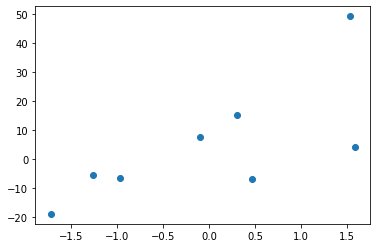

In [3]:
plt.scatter(X,y)

In [4]:
reg = LinearRegression()
reg.fit(X,y)
     
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [5]:
reg.coef_

array([12.10440851])

In [6]:
reg.intercept_

5.020569088319951

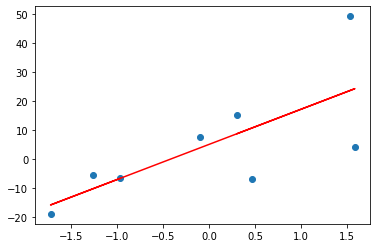

In [7]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [8]:
##keeping m=12.10 we tune the value of b to see the effect on conversation of model
y_pred = ((12.10 * X) + 100).reshape(8)

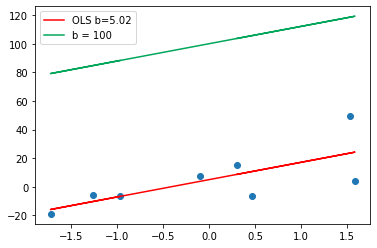

In [12]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS b=5.02')
plt.plot(X,y_pred,color='#00a65a',label='b = 100')
plt.legend()
plt.show()

In [13]:
m = 12.10
b = 100

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
print(loss_slope)
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
print(step_size)

1519.6724293591656
151.96724293591657


In [14]:
#new b
b1 = b - step_size
b1

-51.96724293591657

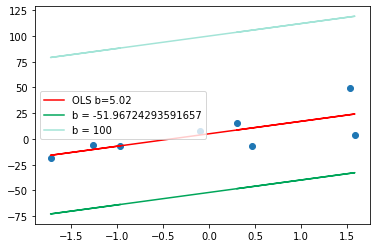

In [15]:
y_pred1 = ((12.10 * X) + b1).reshape(8)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS b=5.02')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b1))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 100')
plt.legend()
plt.show()

# Iteration 2

In [16]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b1)
print(loss_slope)

step_size = loss_slope*lr
print(step_size)
b2 = b1 - step_size
print(b2)

-911.8034576154998
-91.18034576154999
39.21310282563341


In [17]:
y_pred2 = ((12.10 * X) + b2).reshape(8)

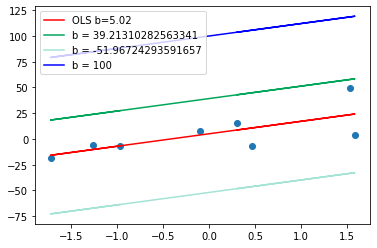

In [19]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS b=5.02')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b2))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b1))
plt.plot(X,y_pred,color='b',label='b = 100')
plt.legend()
plt.show()

# loop

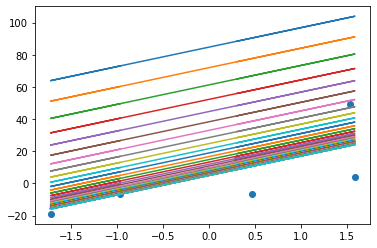

In [24]:
b = 100
m = 12.10
lr = 0.01

epochs = 50

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    b = b - (lr * loss_slope)

    y_pred = m * X + b

    plt.plot(X,y_pred)

plt.scatter(X,y)